In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The shape of the normal dataframe is :  (4046, 188)
Class :  0.0
The shape of the abnormal dataframe is :  (10506, 188)
Class :  1.0
The last time value is :  1488.0


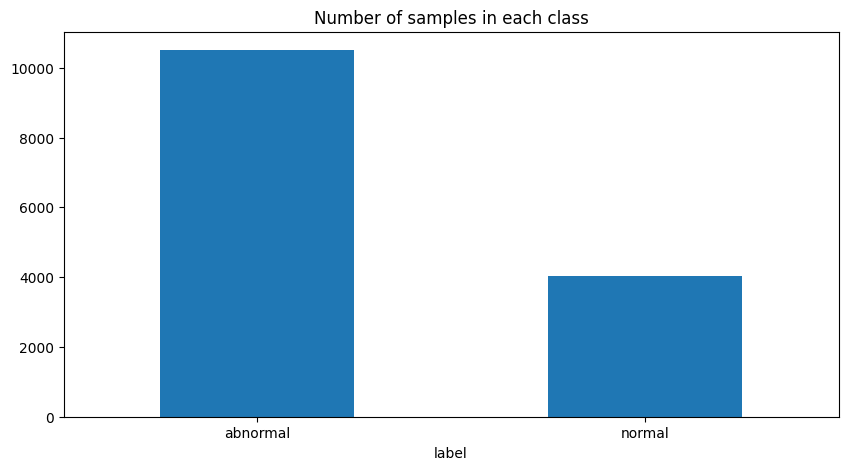

In [3]:
df_ptbd_normal = pd.read_csv("/content/ptbdb_normal.csv", header = None)
df_ptbd_abnormal = pd.read_csv("/content/ptbdb_abnormal.csv", header = None)

# print shapes of the dataframes
print("The shape of the normal dataframe is : ", df_ptbd_normal.shape)
# print one example of the last column
print("Class : ", df_ptbd_normal.iloc[:, -1][0])
print("The shape of the abnormal dataframe is : ", df_ptbd_abnormal.shape)
# print one example of the last column
print("Class : ", df_ptbd_abnormal.iloc[:, -1][0])

# classes are 0 (normal) and 1 (abnormal)
classes_names = {0 : "normal",
                 1 : "abnormal"}

# get the number of columns in the dataframe
# the last column is the label/class
num_cols = df_ptbd_normal.shape[1] - 1
# the signal was resampled at frequency of 125Hz as the input
# compute the time vector
time = np.arange(0, num_cols) / 125
# convert to milliseconds
time = time * 1000
# print last time value
print("The last time value is : ", time[-1])

# for the first "num_cols" and the time steps as column names
df_ptbd_normal.columns = list(time) + ["label"]
df_ptbd_abnormal.columns = list(time) + ["label"]

# concatenate the two dataframes
df_ptbd = pd.concat([df_ptbd_normal, df_ptbd_abnormal], axis = 0)

# count the number of samples in each class and plot a bar chart
# change the class names to "normal" and "abnormal"
# count the number of samples in each class
counts = df_ptbd["label"].value_counts()
# substitute the class names: 0.0 -> normal, 1.0 -> abnormal
counts.index = counts.index.map(classes_names)
# create a figure
plt.figure(figsize = (10, 5))
# plot a bar chart
counts.plot(kind = "bar")
# plot xticks in angle
plt.xticks(rotation = 0)
plt.title("Number of samples in each class")
plt.show()

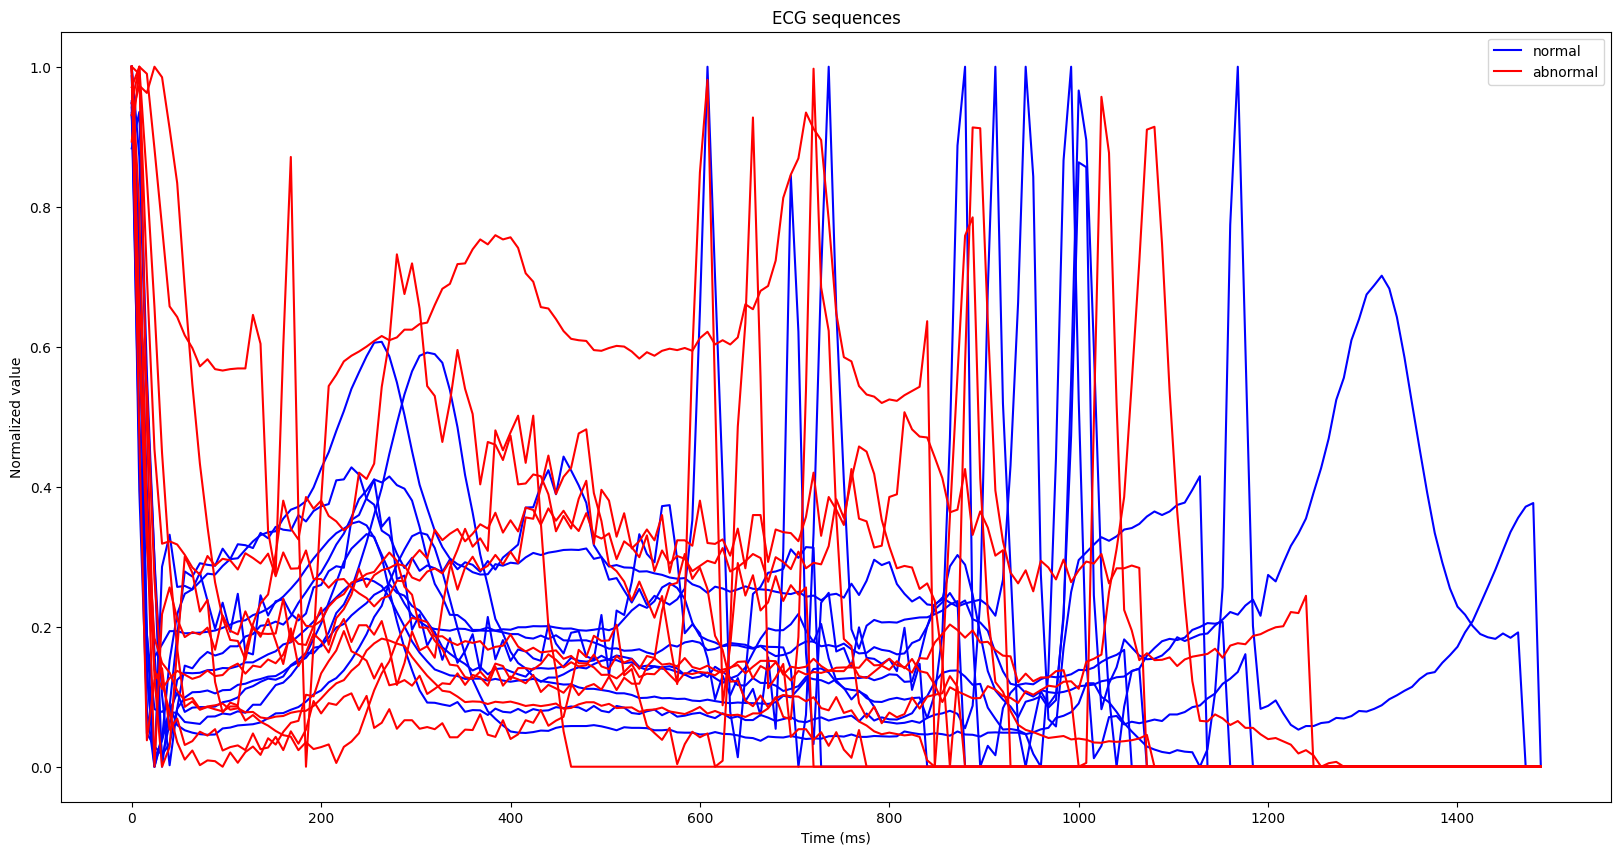

In [4]:
# plot a a row of the dataframe
# select 10 random sequences with class 0 (normal) and 10 with class 1 (abnormal)
df_ptbd_normal = df_ptbd[df_ptbd["label"] == 0].sample(10)
df_ptbd_abnormal = df_ptbd[df_ptbd["label"] == 1].sample(10)

# create a figure
plt.figure(figsize = (20, 10))
# plot againts the column names (time)
# plot the normal sequences
for i in range(df_ptbd_normal.shape[0]):
    if i == 0:
        plt.plot(df_ptbd_normal.columns[:-1], df_ptbd_normal.iloc[i, :-1], color = "blue", label = "normal")
    else:
        plt.plot(df_ptbd_normal.columns[:-1], df_ptbd_normal.iloc[i, :-1],color = "blue")
# plot the abnormal sequences
for i in range(df_ptbd_abnormal.shape[0]):
    if i == 0:
        plt.plot(df_ptbd_abnormal.columns[:-1], df_ptbd_abnormal.iloc[i, :-1], color = "red", label = "abnormal")
    else:
        plt.plot(df_ptbd_abnormal.columns[:-1], df_ptbd_abnormal.iloc[i, :-1], color = "red")
# create a legend for the plot, blue for normal and red for abnormal
plt.legend()
# set the title
plt.title("ECG sequences")
# y lable is "Normalized value"
plt.ylabel("Normalized value")
# x label is "Time (ms)"
plt.xlabel("Time (ms)")
# show the plot
plt.show()
# close
plt.close()

Iteration 1/1
Fold 1 - Logistic Regression:
Actual values: [0. 0. 0. ... 1. 1. 1.]
Predicted values: [0. 0. 1. ... 1. 1. 1.]

Fold 1 - Random Forest:
Actual values: [0. 0. 0. ... 1. 1. 1.]
Predicted values: [0. 1. 0. ... 1. 1. 1.]

Fold 2 - Logistic Regression:
Actual values: [0. 0. 0. ... 1. 1. 1.]
Predicted values: [0. 0. 0. ... 0. 1. 1.]

Fold 2 - Random Forest:
Actual values: [0. 0. 0. ... 1. 1. 1.]
Predicted values: [0. 0. 0. ... 1. 1. 1.]

Fold 3 - Logistic Regression:
Actual values: [0. 0. 0. ... 1. 1. 1.]
Predicted values: [0. 1. 0. ... 1. 1. 1.]

Fold 3 - Random Forest:
Actual values: [0. 0. 0. ... 1. 1. 1.]
Predicted values: [0. 0. 0. ... 1. 1. 1.]

Fold 4 - Logistic Regression:
Actual values: [0. 0. 0. ... 1. 1. 1.]
Predicted values: [0. 1. 0. ... 1. 1. 1.]

Fold 4 - Random Forest:
Actual values: [0. 0. 0. ... 1. 1. 1.]
Predicted values: [0. 1. 1. ... 1. 1. 1.]

Fold 5 - Logistic Regression:
Actual values: [0. 0. 0. ... 1. 1. 1.]
Predicted values: [0. 0. 0. ... 1. 1. 1.]

Fo

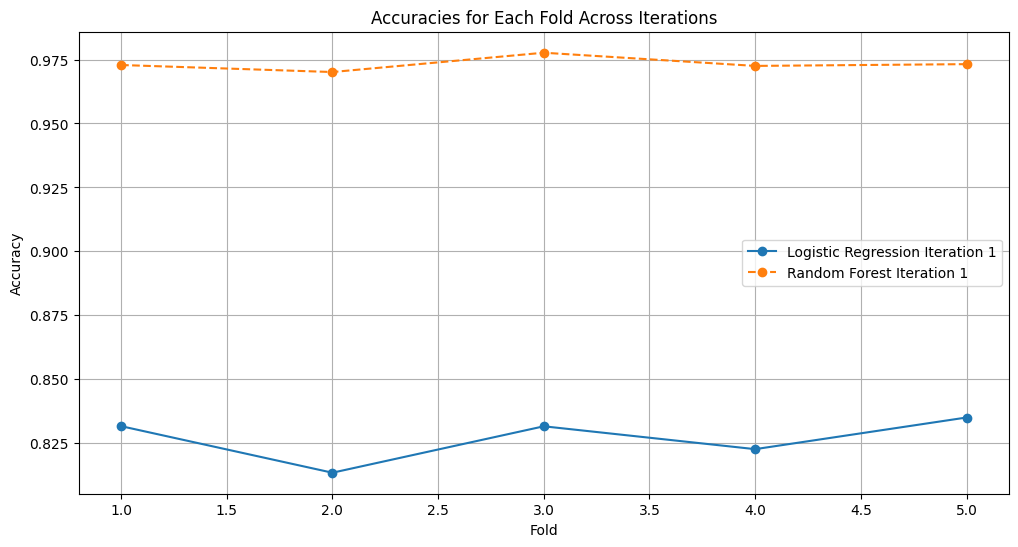

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Classification Report (Iteration 1):
               precision    recall  f1-score   support

      normal       0.00      0.00      0.00      4046
    abnormal       0.72      1.00      0.84     10506

    accuracy                           0.72     14552
   macro avg       0.36      0.50      0.42     14552
weighted avg       0.52      0.72      0.61     14552

Random Forest Classification Report (Iteration 1):
               precision    recall  f1-score   support

      normal       0.99      0.99      0.99      4046
    abnormal       0.99      1.00      1.00     10506

    accuracy                           0.99     14552
   macro avg       0.99      0.99      0.99     14552
weighted avg       0.99      0.99      0.99     14552



In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load datasets
df_ptbd_normal = pd.read_csv("/content/ptbdb_normal.csv", header=None)
df_ptbd_abnormal = pd.read_csv("/content/ptbdb_abnormal.csv", header=None)

# Define class names
classes_names = {0: "normal", 1: "abnormal"}

# Combine the dataframes
df_ptbd = pd.concat([df_ptbd_normal, df_ptbd_abnormal], axis=0)

# Rename columns
num_cols = df_ptbd.shape[1] - 1  # Number of columns excluding the label
time = np.arange(0, num_cols) / 125 * 1000
df_ptbd.columns = list(time) + ["label"]

# Extract features and labels
X = df_ptbd.drop(columns="label")
y = df_ptbd["label"]

# Initialize k-fold cross-validation
k = 5
num_iterations = 1

# Initialize results storage
log_reg_accuracies_all = []
rf_accuracies_all = []

for iteration in range(num_iterations):
    print(f"Iteration {iteration + 1}/{num_iterations}")


    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=iteration)

    log_reg_accuracies = []
    rf_accuracies = []


    for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]


        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)


        log_reg = LogisticRegression(max_iter=1000)
        log_reg.fit(X_train_scaled, y_train)
        y_pred_log_reg = log_reg.predict(X_test_scaled)


        rf_clf = RandomForestClassifier(n_estimators=100, random_state=iteration)
        rf_clf.fit(X_train, y_train)
        y_pred_rf = rf_clf.predict(X_test)


        log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
        rf_accuracy = accuracy_score(y_test, y_pred_rf)


        log_reg_accuracies.append(log_reg_accuracy)
        rf_accuracies.append(rf_accuracy)


        print(f"Fold {fold} - Logistic Regression:")
        print("Actual values:", y_test.values)
        print("Predicted values:", y_pred_log_reg)
        print()

        print(f"Fold {fold} - Random Forest:")
        print("Actual values:", y_test.values)
        print("Predicted values:", y_pred_rf)
        print()


    print(f"Iteration {iteration + 1} Results:")
    for fold in range(k):
        print(f"Fold {fold + 1} - Logistic Regression Accuracy: {log_reg_accuracies[fold]:.4f}")
        print(f"Fold {fold + 1} - Random Forest Accuracy: {rf_accuracies[fold]:.4f}")
        print()


    log_reg_accuracies_all.append(log_reg_accuracies)
    rf_accuracies_all.append(rf_accuracies)


log_reg_accuracies_all = np.array(log_reg_accuracies_all)
rf_accuracies_all = np.array(rf_accuracies_all)


plt.figure(figsize=(12, 6))
for i in range(num_iterations):
    plt.plot(range(1, k + 1), log_reg_accuracies_all[i], marker='o', label=f'Logistic Regression Iteration {i + 1}')
    plt.plot(range(1, k + 1), rf_accuracies_all[i], marker='o', linestyle='--', label=f'Random Forest Iteration {i + 1}')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracies for Each Fold Across Iterations')
plt.legend()
plt.grid(True)
plt.show()


last_iteration = num_iterations - 1
print(f"Logistic Regression Classification Report (Iteration {last_iteration + 1}):\n",
      classification_report(y, log_reg.predict(X), target_names=[classes_names[i] for i in range(2)]))
print(f"Random Forest Classification Report (Iteration {last_iteration + 1}):\n",
      classification_report(y, rf_clf.predict(X), target_names=[classes_names[i] for i in range(2)]))


Iteration 1/10
Iteration 2/10
Iteration 3/10
Iteration 4/10
Iteration 5/10
Iteration 6/10
Iteration 7/10
Iteration 8/10
Iteration 9/10
Iteration 10/10
   Iteration  Logistic Regression Accuracy  Random Forest Accuracy  \
0          1                      0.839286                0.972527   
1          2                      0.828984                0.975962   
2          3                      0.825430                0.977320   
3          4                      0.819931                0.971821   
4          5                      0.826117                0.970447   
5          6                      0.817182                0.980069   
6          7                      0.832302                0.973883   
7          8                      0.833677                0.975258   
8          9                      0.832302                0.970447   
9         10                      0.823368                0.975945   

   XGBoost Accuracy                                      Actual Values  \
0   

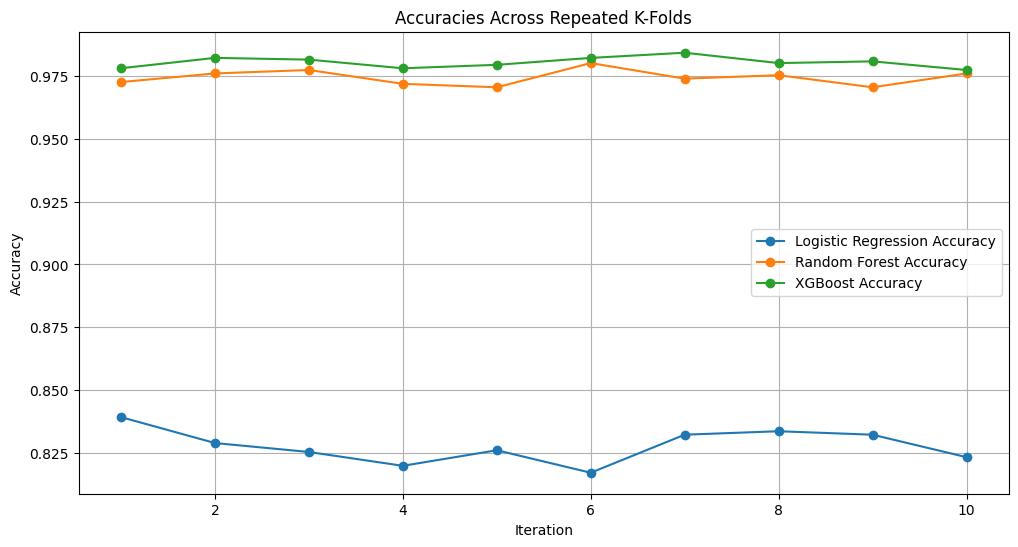

In [22]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb


df_ptbd_normal = pd.read_csv("/content/ptbdb_normal.csv", header=None)
df_ptbd_abnormal = pd.read_csv("/content/ptbdb_abnormal.csv", header=None)


classes_names = {0: "normal", 1: "abnormal"}

# Combine the dataframes
df_ptbd = pd.concat([df_ptbd_normal, df_ptbd_abnormal], axis=0)


num_cols = df_ptbd.shape[1] - 1
time = np.arange(0, num_cols) / 125 * 1000
df_ptbd.columns = list(time) + ["label"]


X = df_ptbd.drop(columns="label")
y = df_ptbd["label"]


k = 10
n_repeats = 1
rkf = RepeatedKFold(n_splits=k, n_repeats=n_repeats, random_state=42)


results = []
best_model_info = {
    'model': None,
    'highest_accuracy': 0,
    'predictions': None,
    'actual_values': None,
    'iteration': None,
    'fold': None
}


for iteration, (train_index, test_index) in enumerate(rkf.split(X, y), 1):
    print(f"Iteration {iteration}/{n_repeats * k }")

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)


    log_reg = LogisticRegression(max_iter=1000)
    log_reg.fit(X_train_scaled, y_train)
    y_pred_log_reg = log_reg.predict(X_test_scaled)


    rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_clf.fit(X_train, y_train)
    y_pred_rf = rf_clf.predict(X_test)


    xgb_clf = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)
    xgb_clf.fit(X_train, y_train)
    y_pred_xgb = xgb_clf.predict(X_test)


    log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
    rf_accuracy = accuracy_score(y_test, y_pred_rf)
    xgb_accuracy = accuracy_score(y_test, y_pred_xgb)


    accuracies = {
        'Logistic Regression Accuracy': log_reg_accuracy,
        'Random Forest Accuracy': rf_accuracy,
        'XGBoost Accuracy': xgb_accuracy
    }

    best_model = max(accuracies, key=accuracies.get)
    best_accuracy = accuracies[best_model]

    if best_accuracy > best_model_info['highest_accuracy']:
        best_model_info['highest_accuracy'] = best_accuracy
        best_model_info['model'] = best_model
        best_model_info['iteration'] = iteration
        best_model_info['fold'] = len(results) // (n_repeats * k) + 1

        if best_model == 'Logistic Regression Accuracy':
            best_model_info['predictions'] = y_pred_log_reg
        elif best_model == 'Random Forest Accuracy':
            best_model_info['predictions'] = y_pred_rf
        elif best_model == 'XGBoost Accuracy':
            best_model_info['predictions'] = y_pred_xgb

        best_model_info['actual_values'] = y_test.values


    fold_results = {
        'Iteration': iteration,
        'Logistic Regression Accuracy': log_reg_accuracy,
        'Random Forest Accuracy': rf_accuracy,
        'XGBoost Accuracy': xgb_accuracy,
        'Actual Values': ','.join(map(str, y_test.values)),
        'Logistic Regression Predictions': ','.join(map(str, y_pred_log_reg)),
        'Random Forest Predictions': ','.join(map(str, y_pred_rf)),
        'XGBoost Predictions': ','.join(map(str, y_pred_xgb))
    }
    results.append(fold_results)


results_df = pd.DataFrame(results)


results_df.to_csv('k_fold_results_with_xgboost_rkf.csv', index=False)


print(results_df)


if best_model_info['model']:
    best_model_results_df = pd.DataFrame({
        'Actual Values': best_model_info['actual_values'],
        f'{best_model_info["model"]} Predictions': best_model_info['predictions']
    })
    best_model_results_df.to_csv('best_model_predictions.csv', index=False)


plt.figure(figsize=(12, 6))
for model in ['Logistic Regression Accuracy', 'Random Forest Accuracy', 'XGBoost Accuracy']:
    plt.plot(results_df['Iteration'], results_df[model], marker='o', label=model)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracies Across Repeated K-Folds')
plt.legend()
plt.grid(True)
plt.show()
